# Data Description
- Date: Date of record
- Time: 24 hour time
- Eyeball: # of people who opened the app
- Zeroes: # of people who didn't see any cars 
- Completed Trips: # of people who completed trips
- Requests: # of requested trips
- Unique Drivers: # of drivers logged in 

# 1. Which date had the most completed trips during the two week period?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset_1.csv")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [3]:
# A lot of empty dates
df[~df["Date"].isnull()]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
17,11-Sep-12,0,9,3,1,1,3
41,12-Sep-12,0,9,2,0,1,2
65,13-Sep-12,0,11,11,0,2,0
89,14-Sep-12,0,10,1,3,4,3
113,15-Sep-12,0,45,2,23,24,19
137,16-Sep-12,0,44,2,17,20,15
161,17-Sep-12,0,11,5,0,2,2
185,18-Sep-12,0,28,18,3,13,4
209,19-Sep-12,0,9,1,0,0,3


In [4]:
# Can use ffill() to fill in the gaps for Date
df = df.ffill().copy(deep=True)
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [5]:
# Calculating most completed trips
df.groupby("Date").sum()["Completed Trips "].sort_values(ascending=False)

Date
22-Sep-12    248
15-Sep-12    199
21-Sep-12    190
23-Sep-12    111
14-Sep-12    108
16-Sep-12     93
12-Sep-12     91
20-Sep-12     70
17-Sep-12     57
13-Sep-12     45
18-Sep-12     42
19-Sep-12     41
11-Sep-12     40
10-Sep-12     26
24-Sep-12      4
Name: Completed Trips , dtype: int64

# 2. What was the highest number of completed trips within a 24 hour period?

In [6]:
# Highest number of completed trips within a 24 hour period -> max completed trips within 24 hours
df.groupby("Date").max()["Completed Trips "].sort_values(ascending=False)

Date
21-Sep-12    36
22-Sep-12    25
14-Sep-12    24
15-Sep-12    24
23-Sep-12    23
16-Sep-12    17
20-Sep-12    14
12-Sep-12     9
19-Sep-12     9
11-Sep-12     8
17-Sep-12     8
13-Sep-12     7
18-Sep-12     6
10-Sep-12     4
24-Sep-12     2
Name: Completed Trips , dtype: int64

# 3. Which hour of the day had the most requests during the two week period?

In [7]:
# Assuming that this is looked at cumulatively 
df.groupby("Time (Local)").sum(numeric_only=True)["Requests "].sort_values(ascending=False)

Time (Local)
23    184
22    174
19    156
0     142
18    119
21    112
20    107
2     100
17     98
1      96
16     82
14     71
15     71
13     55
12     53
11     47
3      35
8      29
10     28
6      28
9      26
7      22
5      14
4       9
Name: Requests , dtype: int64

# 4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [8]:
# Percentage of all zeroes during the two week period occurred on a weekend -> sum(zeroes) weekend / sum(zeroes) total

# Looking at the calendar, September 10, 2012 is a Monday
# So weekends would be September 14 (Friday) 5pm to September 16 (Sunday) 3am and September 21 (Friday) 5pm to Septmeber 23 (Sunday) 3am

# Instead of coming up with some filter to get the rows, can use a little math
# Every column indicates an hour of time and the data is conveniently sorted so that the date + time starts at the earliest and goes to the latest values
# Hence, the smaller the index, the earlier we are within the data
# So, Friday at 5PM means we have 4 Full days + 17 hours. We'll have to subtract 7 hours since the data starts at 7 (Time column starts at 7)
# In other words we get 24 * 4 + 17 - 7 = 106. Checking value at df.iloc[106] to make sure I don't have a one-off error
df.iloc[106]



Date                14-Sep-12
Time (Local)               17
Eyeballs                   34
Zeroes                      4
Completed Trips             3
Requests                    5
Unique Drivers             13
Name: 106, dtype: object

In [9]:
# Moving further with this train of thought, Sunday can be calculated as follows:
# 6 Full days + 2 hours - 7 hours = 24 * 6 + 3 - 7 = 139
# 2 hours since its up to 3am
df.iloc[139]

Date                16-Sep-12
Time (Local)                2
Eyeballs                   29
Zeroes                      2
Completed Trips            13
Requests                   15
Unique Drivers             12
Name: 139, dtype: object

In [10]:
# Instead of trying to do the same math for the next weekend, we can calculate how many rows we need to skip to move to the next week
# Each row is an hour, and we have 7 * 24 = 168 hours in the week, so the start and end point should be
# Start = 106 + 168 = 274
# End = 139 + 168 = 307
df.iloc[[274,307]]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
274,21-Sep-12,17,68,25,26,26,20
307,23-Sep-12,2,34,4,13,18,18


In [11]:
# Filtering
weekend_indices = list(range(106,141)) + list(range(274,308)) 
df.iloc[weekend_indices]


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
106,14-Sep-12,17,34,4,3,5,13
107,14-Sep-12,18,40,2,8,9,14
108,14-Sep-12,19,46,6,9,10,15
109,14-Sep-12,20,38,4,8,9,14
110,14-Sep-12,21,49,6,8,9,17
...,...,...,...,...,...,...,...
303,22-Sep-12,22,77,11,25,33,19
304,22-Sep-12,23,99,59,25,44,17
305,23-Sep-12,0,62,25,23,32,18
306,23-Sep-12,1,38,1,15,23,18


In [12]:
# Weekend zeroes
df.iloc[weekend_indices].sum()["Zeroes "]

643

In [13]:
# Percentage of zeroes on weekends is as follows
df.iloc[weekend_indices].sum()["Zeroes "] / df.sum()["Zeroes "] * 100

44.996501049685094

In [14]:
# But filtering without all this math would look like this
df["Date"] = df["Date"].astype("datetime64[D]")
df[
    (((df["Date"] == "2012-09-14") &
    (df["Time (Local)"] >= 17)) |
    (df["Date"] == "2012-09-15") |
    ((df["Date"] == "2012-09-16") &
    (df["Time (Local)"] <= 2))) |
    (((df["Date"] == "2012-09-21") &
    (df["Time (Local)"] >= 17)) |
    (df["Date"] == "2012-09-22") |
    ((df["Date"] == "2012-09-23") &
    (df["Time (Local)"] <= 2)))
]
# not complex, but tedious to write. better method is to have day of the week indicate to make the above filtering simple so you can state Fri, Sat, Sun

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
106,2012-09-14,17,34,4,3,5,13
107,2012-09-14,18,40,2,8,9,14
108,2012-09-14,19,46,6,9,10,15
109,2012-09-14,20,38,4,8,9,14
110,2012-09-14,21,49,6,8,9,17
...,...,...,...,...,...,...,...
303,2012-09-22,22,77,11,25,33,19
304,2012-09-22,23,99,59,25,44,17
305,2012-09-23,0,62,25,23,32,18
306,2012-09-23,1,38,1,15,23,18


# 5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [15]:
df['completed_trip_ratio_per_driver'] = df['Completed Trips '] / df['Unique Drivers']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver
0,2012-09-10,7,5,0,2,2,9,0.222222
1,2012-09-10,8,6,0,2,2,14,0.142857
2,2012-09-10,9,8,3,0,0,14,0.000000
3,2012-09-10,10,9,2,0,1,14,0.000000
4,2012-09-10,11,11,1,4,4,11,0.363636
...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,NaN
332,2012-09-24,3,3,3,0,1,0,NaN
333,2012-09-24,4,1,1,0,0,0,NaN
334,2012-09-24,5,4,2,1,1,3,0.333333


In [16]:
# removing NaN
dataset_without_zero_unique_driver = df[df['Unique Drivers'] > 0]
weighted_average_ratio = np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'], weights=dataset_without_zero_unique_driver['Completed Trips '])
weighted_average_ratio * 100

82.82775715092396

# 6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [17]:
# Iterate over all possible start times for the 8 hour shift
# Busy -> more requests = more busy. eyeballs isn't a good idea to use.

requests_per_hour = df.groupby("Time (Local)").sum(numeric_only=True)["Requests "]
requests_per_hour

Time (Local)
0     142
1      96
2     100
3      35
4       9
5      14
6      28
7      22
8      29
9      26
10     28
11     47
12     53
13     55
14     71
15     71
16     82
17     98
18    119
19    156
20    107
21    112
22    174
23    184
Name: Requests , dtype: int64

In [18]:
# can loop through the above table and then sum up every possible 8 hour shift

# generate indices for some 8 hour shift
# update indices if any are > 23 
# loop through indices and sum

requests_per_shift = {}

for start_time in requests_per_hour.index:
    shift_hours = list(range(start_time,start_time + 8))    

    for shift_hour_pos in range(8):
        if shift_hours[shift_hour_pos] > 23:
            # need to subtract a 1 since the hours start at 0. Ex. 24 % 23 - 1 = 0 giving you the first hour in the table
            shift_hours[shift_hour_pos] = shift_hours[shift_hour_pos] % 23 - 1
    
    total_hours = 0

    for hour in shift_hours:
        total_hours = total_hours + requests_per_hour.iloc[hour]

    requests_per_shift[start_time] = total_hours

requests_per_shift

{0: 446,
 1: 333,
 2: 263,
 3: 191,
 4: 203,
 5: 247,
 6: 288,
 7: 331,
 8: 380,
 9: 433,
 10: 505,
 11: 596,
 12: 705,
 13: 759,
 14: 816,
 15: 919,
 16: 1032,
 17: 1092,
 18: 1090,
 19: 1071,
 20: 950,
 21: 852,
 22: 754,
 23: 608}

In [19]:
# and then to finalize the answer, the busiest 8 hour shift would be from 5pm to 1am

# 7. True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.


In [20]:
# maybe line graph?
# lets not aggregate data for now and see what it shows
df["Datetime"] = df["Date"].astype("str") + " " + df["Time (Local)"].astype("str") + ":00"
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,Datetime
0,2012-09-10,7,5,0,2,2,9,0.222222,2012-09-10 7:00
1,2012-09-10,8,6,0,2,2,14,0.142857,2012-09-10 8:00
2,2012-09-10,9,8,3,0,0,14,0.000000,2012-09-10 9:00
3,2012-09-10,10,9,2,0,1,14,0.000000,2012-09-10 10:00
4,2012-09-10,11,11,1,4,4,11,0.363636,2012-09-10 11:00
...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,NaN,2012-09-24 2:00
332,2012-09-24,3,3,3,0,1,0,NaN,2012-09-24 3:00
333,2012-09-24,4,1,1,0,0,0,NaN,2012-09-24 4:00
334,2012-09-24,5,4,2,1,1,3,0.333333,2012-09-24 5:00


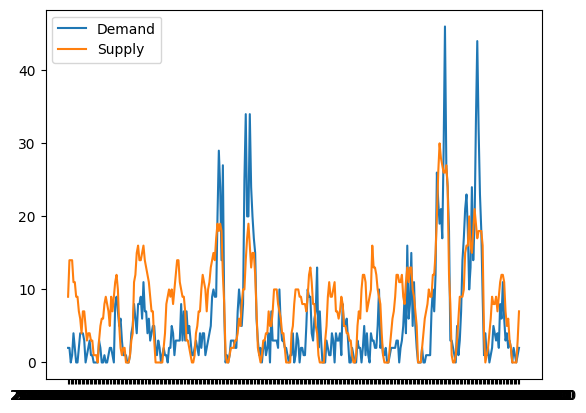

In [21]:
x_vals = df["Datetime"]
demand_vals = df["Requests "]
supply_vals = df["Unique Drivers"]

plt.plot(x_vals,demand_vals,label="Demand")
plt.plot(x_vals,supply_vals,label="Supply")
plt.legend()
plt.show()

In [23]:
# ignoring the obvious issue with the x-labels, supply seems to follow demand a bit 
# let's try a different chart. if demand follows supply, then the differences between demand and supply should generally be small
df["Diff"] = df["Requests "] - df["Unique Drivers"]
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,Datetime,Diff
0,2012-09-10,7,5,0,2,2,9,0.222222,2012-09-10 7:00,-7
1,2012-09-10,8,6,0,2,2,14,0.142857,2012-09-10 8:00,-12
2,2012-09-10,9,8,3,0,0,14,0.000000,2012-09-10 9:00,-14
3,2012-09-10,10,9,2,0,1,14,0.000000,2012-09-10 10:00,-13
4,2012-09-10,11,11,1,4,4,11,0.363636,2012-09-10 11:00,-7
...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,NaN,2012-09-24 2:00,2
332,2012-09-24,3,3,3,0,1,0,NaN,2012-09-24 3:00,1
333,2012-09-24,4,1,1,0,0,0,NaN,2012-09-24 4:00,0
334,2012-09-24,5,4,2,1,1,3,0.333333,2012-09-24 5:00,-2


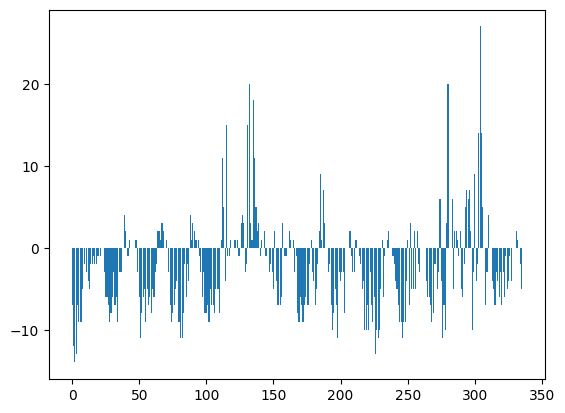

In [25]:
x_vals = df.index
y_vals = df["Diff"]
plt.bar(x_vals,y_vals)
plt.show()

In [ ]:
# this gives a better look at demand vs supply. The answer is false

# 8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [27]:
# similar to the 8 hour shift problem
df["Zeroes Eyeball Ratio"] = df["Zeroes "] / df["Eyeballs "]
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,Datetime,Diff,Zeroes Eyeball Ratio
0,2012-09-10,7,5,0,2,2,9,0.222222,2012-09-10 7:00,-7,0.000000
1,2012-09-10,8,6,0,2,2,14,0.142857,2012-09-10 8:00,-12,0.000000
2,2012-09-10,9,8,3,0,0,14,0.000000,2012-09-10 9:00,-14,0.375000
3,2012-09-10,10,9,2,0,1,14,0.000000,2012-09-10 10:00,-13,0.222222
4,2012-09-10,11,11,1,4,4,11,0.363636,2012-09-10 11:00,-7,0.090909
...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,NaN,2012-09-24 2:00,2,1.000000
332,2012-09-24,3,3,3,0,1,0,NaN,2012-09-24 3:00,1,1.000000
333,2012-09-24,4,1,1,0,0,0,NaN,2012-09-24 4:00,0,1.000000
334,2012-09-24,5,4,2,1,1,3,0.333333,2012-09-24 5:00,-2,0.500000


In [28]:
df[df["Zeroes Eyeball Ratio"].isnull()]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,Datetime,Diff,Zeroes Eyeball Ratio
261,2012-09-21,4,0,0,0,0,0,NaN,2012-09-21 4:00,0,NaN


In [30]:
df.fillna(0,inplace=True)
df[df["Zeroes Eyeball Ratio"].isnull()]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,Datetime,Diff,Zeroes Eyeball Ratio


In [32]:
ratio_dict = {}
loop_counter = 0
period_counter = 1
ratio_sum = 0
for pos in df.index:
    loop_counter += 1
    ratio_sum += df["Zeroes Eyeball Ratio"].iloc[pos]
    
    if loop_counter == 72: 
        loop_counter = 0
        ratio_dict[period_counter] = ratio_sum
        ratio_sum = 0
        period_counter += 1

ratio_dict

    # print(df["Zeroes Eyeball Ratio"].iloc[pos])
    

{1: 23.65449363956722,
 2: 23.006997290574567,
 3: 20.773793056368866,
 4: 18.266655028337745}

In [ ]:
# The first 72 hours in the data has the highest ratio

# 9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing

In [36]:
# Ideally, we'd want to pick dates where eyeballs are the highest and unique drivers are the lowest
df["Eyeball - Unique Drivers"] = df["Eyeballs "] - df["Unique Drivers"]
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,completed_trip_ratio_per_driver,Datetime,Diff,Zeroes Eyeball Ratio,Eyeball - Unique Drivers
0,2012-09-10,7,5,0,2,2,9,0.222222,2012-09-10 7:00,-7,0.000000,-4
1,2012-09-10,8,6,0,2,2,14,0.142857,2012-09-10 8:00,-12,0.000000,-8
2,2012-09-10,9,8,3,0,0,14,0.000000,2012-09-10 9:00,-14,0.375000,-6
3,2012-09-10,10,9,2,0,1,14,0.000000,2012-09-10 10:00,-13,0.222222,-5
4,2012-09-10,11,11,1,4,4,11,0.363636,2012-09-10 11:00,-7,0.090909,0
...,...,...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,0.000000,2012-09-24 2:00,2,1.000000,3
332,2012-09-24,3,3,3,0,1,0,0.000000,2012-09-24 3:00,1,1.000000,3
333,2012-09-24,4,1,1,0,0,0,0.000000,2012-09-24 4:00,0,1.000000,1
334,2012-09-24,5,4,2,1,1,3,0.333333,2012-09-24 5:00,-2,0.500000,1


In [39]:
# So, positive value means more people looking on the app than there are drivers who can service them. 
# want to find hour of each day that has the highest value
df.groupby("Time (Local)").sum(numeric_only=True)["Eyeball - Unique Drivers"].sort_values(ascending=False)

Time (Local)
23    369
22    348
21    304
18    273
19    268
20    247
17    243
0     228
16    214
14    207
15    198
13    189
12    146
11    131
10    114
1     113
2     108
9      92
8      56
7      51
3      43
6      41
5      31
4      20
Name: Eyeball - Unique Drivers, dtype: int64

In [ ]:
# Between 11pm to midnight would be the best time to put 5 extra drivers for each day

# 10. True or False: There is exactly two weeks of data in this analysis

In [41]:
# Each row communicates 1 hours worth of data, so we can use a little math here
# Two weeks = 2 * 7 * 24 = 336 hours so we should have 336 rows of data 
df.shape

(336, 12)

In [42]:
# dataframe has 336 rows so answer is true

# 11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.

In [50]:
df.groupby("Time (Local)").sum(numeric_only=True)[["Unique Drivers","Requests "]].sort_values(by="Unique Drivers",ascending=True)

,Unique Drivers,Requests
Time (Local),,
4,9,9
5,11,14
6,37,28
3,40,35
7,60,22
2,62,100
1,94,96
8,95,29
9,110,26


In [ ]:
# 4am is the best time to consider it as the "end of day" given that it has the least demand and supply